# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Import Dataset

In [2]:
col_names = ['id','sep_length', 'sep_width', 'pet_length', 'pet_height', 'type']
data = pd.read_csv("Iris.csv", sep=',',skiprows=1, header=None,names=col_names )
data.head()

,id,sep_length,sep_width,pet_length,pet_height,type
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,id,sep_length,sep_width,pet_length,pet_height,type
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
label_encoder = LabelEncoder()
label_encoder.fit(data['type'])
encoded_type = label_encoder.transform(data['type'])
encoded_type

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
encoded_dataset = data.copy()
encoded_dataset['type'] = encoded_type
encoded_dataset= encoded_dataset.drop('id', axis = 1)
encoded_dataset

,sep_length,sep_width,pet_length,pet_height,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = encoded_dataset.iloc[:, :-1].values
Y = encoded_dataset.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [10]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)



[Text(0.375, 0.9285714285714286, 'pet_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(0.25, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'pet_height <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(0.25, 0.6428571428571429, 'pet_length <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.6428571428571429, 'pet_length <= 5.05\ngini = 0.093\nsamples = 41\nvalue = [0, 2, 39]'),
 Text(0.625, 0.5, 'sep_width <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.75, 0.35714285714285715, 'pet_length <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.625, 0.21428571428571427, 'sep_width <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.5

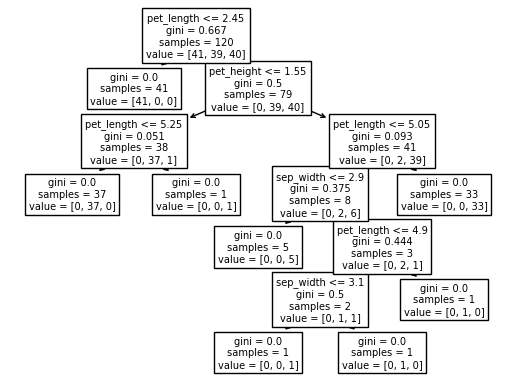

In [12]:
features = ['sep_length', 'sep_width', 'pet_length', 'pet_height']
tree.plot_tree(dtree, feature_names=features)

In [16]:
y_pred = dtree.predict(x)
accuracy_score(Y_test, y_pred)

0.9

In [17]:
print(y_pred)
print(Y_test.tolist())

[1 2 2 1 2 1 2 1 2 2 2 0 0 1 0 1 0 2 0 0 1 2 0 0 1 1 1 1 0 1]
[[2], [2], [2], [1], [2], [1], [2], [1], [2], [2], [2], [0], [0], [1], [0], [2], [0], [1], [0], [0], [1], [2], [0], [0], [1], [1], [1], [1], [0], [1]]
